## Installing package

In [ ]:
!pip install -e ../

In [18]:
from sc309 import scanpy_workflow

In [2]:
import scanpy as sc

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.4 scipy==1.3.0 pandas==0.25.3 scikit-learn==0.21.2 statsmodels==0.10.0 python-igraph==0.7.1 louvain==0.6.1


## First, import your single cell data from a text file

In [4]:
#gzip -d is the same as gunzip, but works on Windows

!gzip -d ../Kidney_allo_rejection_python_input.txt.gz
adata = sc.read_text(
    '../Kidney_allo_rejection_python_input.txt')  # the directory with the `.mtx` file
    # use gene symbols for the variable names (variables-axis index)
#Github cannot handle large files, so zipping compresses the large file.
!gzip ../Kidney_allo_rejection_python_input.txt

In [17]:
!gzip ../Kidney_allo_rejection_python_input.txt

#### Do not run unless for GSE dataset

In [ ]:
# import gzip
# import shutil
# with gzip.open('../GSE109564_Kidney.biopsy.dge.txt.gz', 'rb') as f_in:
#     with open('../GSE109564_Kidney.biopsy.dge.txt', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)
# # Transporsing the text files in python
# dataframe = pd.read_csv("../GSE109564_Kidney.biopsy.dge.txt",delimiter="\t")
# dataframe = pd.DataFrame.transpose(dataframe)
# dataframe.to_csv("Kidney.biopsy.dge.csv", encoding='utf-8', index=False)
# # Starting analysis
# adata = sc.read_csv(
#     './Kidney.biopsy.dge.csv')  # the directory with the .mtx file
#     # use gene symbols for the variable names (variables-axis index)

In [6]:
adata

AnnData object with n_obs × n_vars = 4487 × 20477 

## You can use scanpy to look at the top genes to make sure that your data has been imported correctly

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


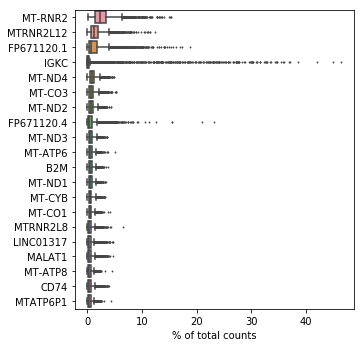

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20)

## Filtering cells and Normalization

In [8]:
scanpy_workflow.filterRegress(adata)

normalizing by total count per cell


Trying to set attribute `.obs` of view, making a copy.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['n_counts', 'percent_mito']


//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


    finished (0:00:18)


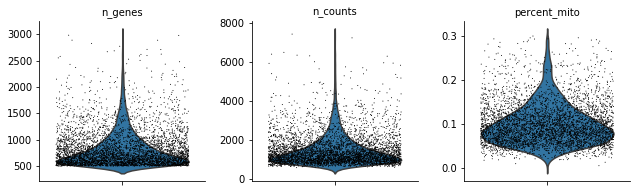

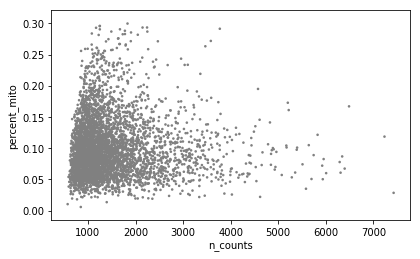

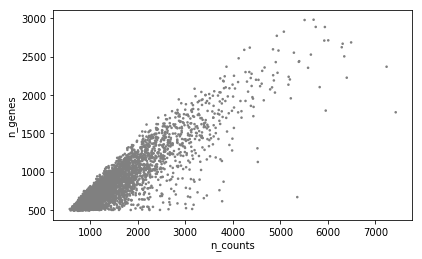

AttributeError: 'DataFrame' object has no attribute 'highly_variable'

In [9]:
scanpy_workflow.summarystatsplots(adata)

## PCA and UMAP

computing PCA with n_comps = 50
    finished (0:00:06)
computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 19 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:42)


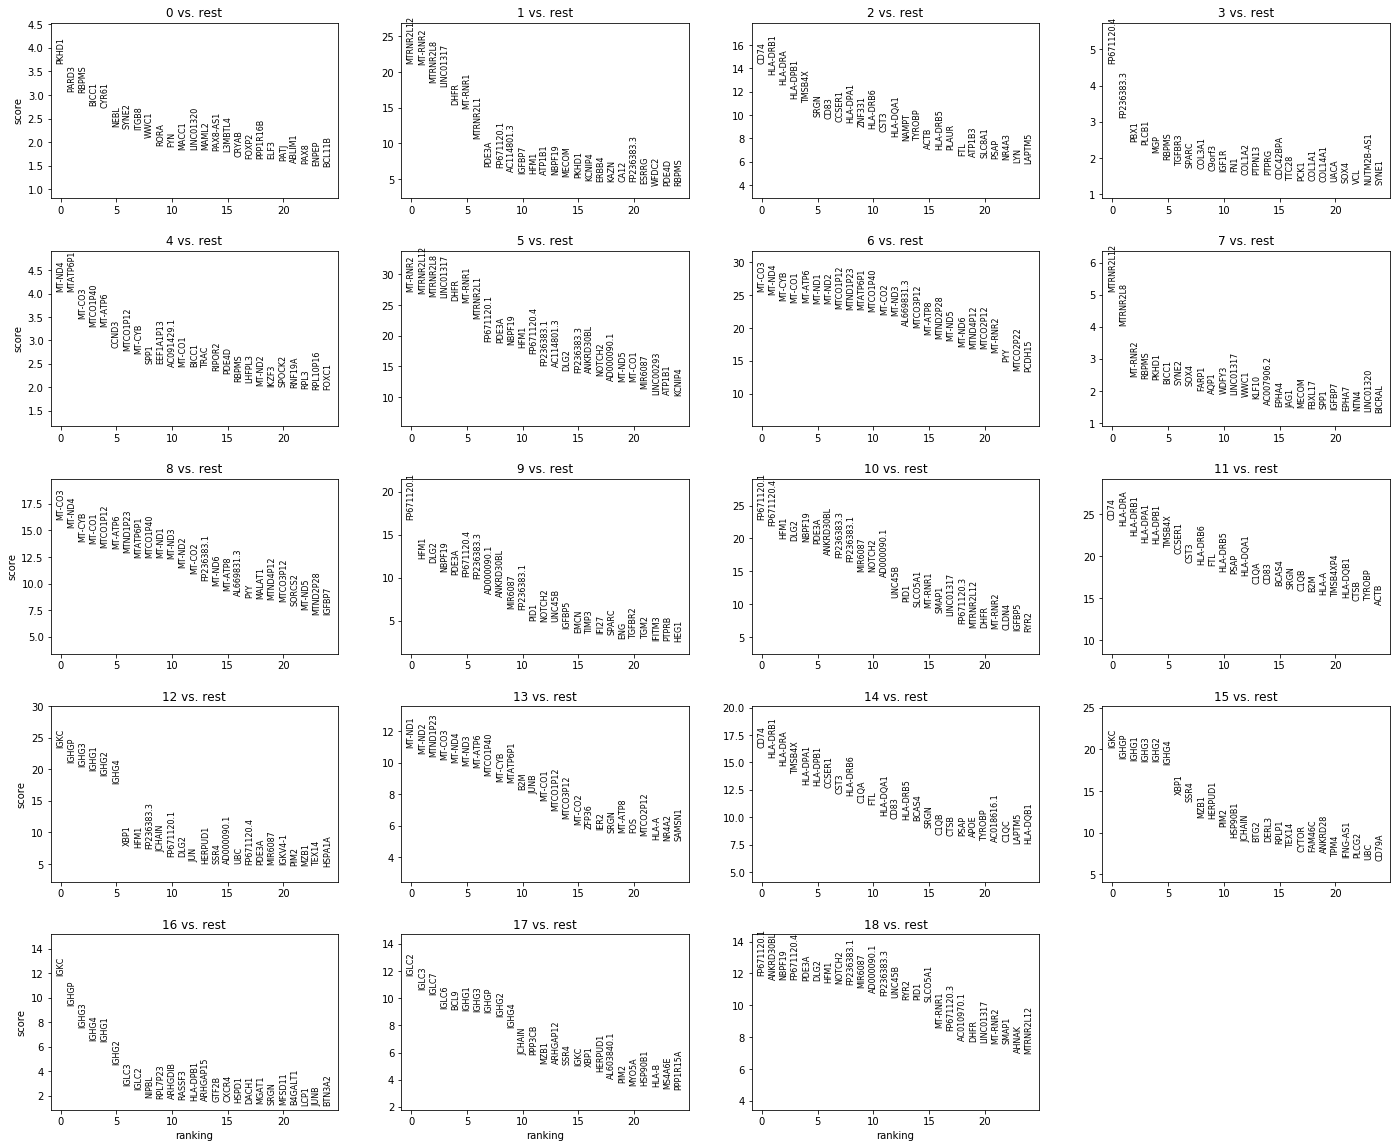

In [10]:
scanpy_workflow.topclustergenes(adata)

## Visualizing genes

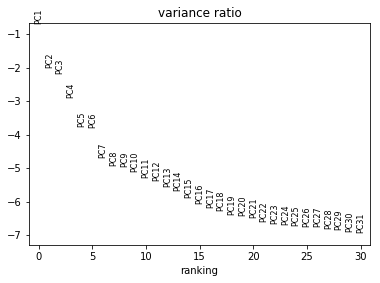

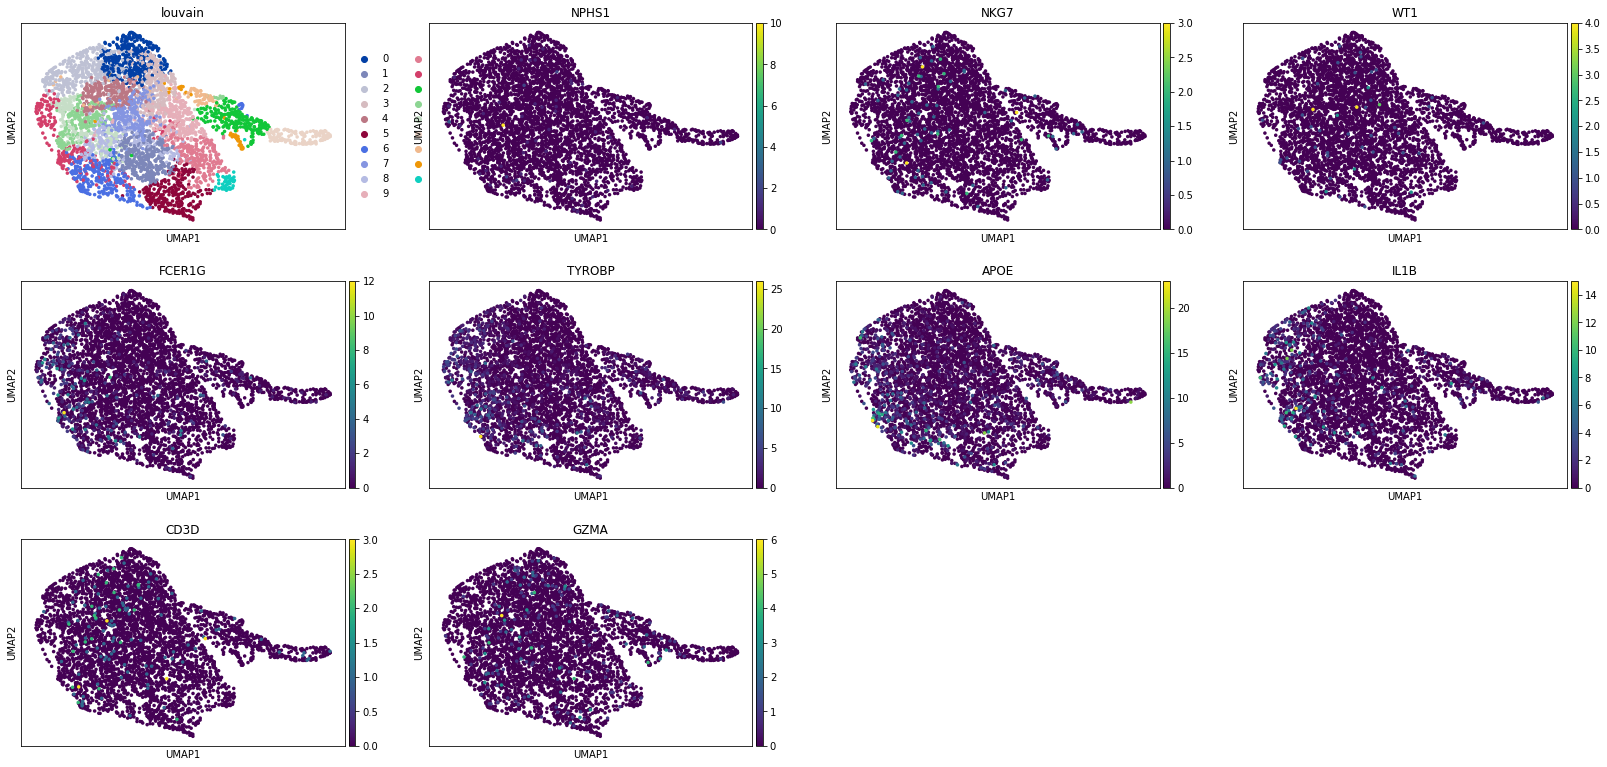

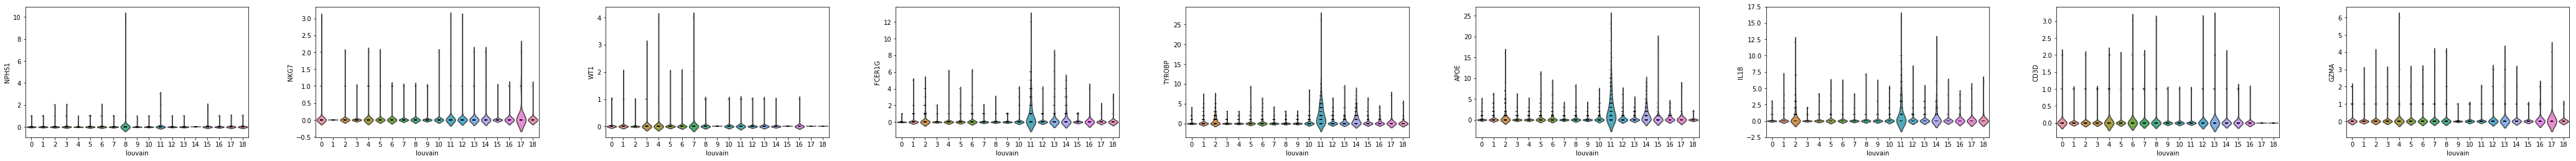

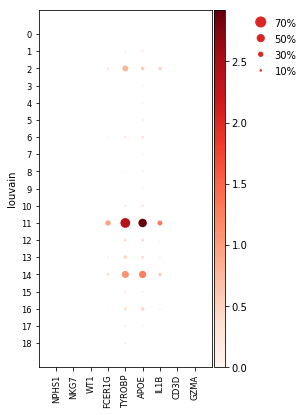

In [11]:
scanpy_workflow.visualizegenes(adata)